In [25]:
import numpy as np
from scipy.optimize import newton

altura_torre = (115360 + 9640) * 10**-3
altura_camera = (12000 + 4360 + 12000 + 2500)* 10**-3
altura_LT = altura_torre - 13.27 # Altura do cabo de transmissão de energia
metade_horizontal = 14300 * 10**-3
offset_horizontal = 0 
camera_horizontal = metade_horizontal - offset_horizontal


## Cabo de transmissão de energia
print("Cálculo da catenária de um cabo de transmissão de energia:")
# Dados do cabo
w = 2.2204  # kgf/m
T0 = 3095.3485  # kgf
L = 975.30 #799.50  # m
h = -0  # m (desnível)

# Parâmetro da catenária
a_LT = T0 / w
print(f"Parâmetro da catenária (a): {a_LT:.2f} m")
# Função para calcular a catenária nivelada (h = 0)
def catenaria(x,a):
    return a * np.cosh(x / a)

# Flecha (nívelada)
f_LT = catenaria(L/2,a_LT) - a_LT
print(f"Flecha (nívelada): {f_LT:.2f} m")

# Comprimento do cabo (nívelado)
S_LT = 2 * a_LT * np.sinh(L / (2 * a_LT))    
print(f"Comprimento do cabo: {S_LT:.2f} m")

Cálculo da catenária de um cabo de transmissão de energia:
Parâmetro da catenária (a): 1394.05 m
Flecha (nívelada): 86.17 m
Comprimento do cabo: 995.31 m


In [ ]:
## Cabo de sinalização e para raio
print("Cálculo da catenária de um cabo de sinalização e para raio:")
# Dados do cabo
w =  690/1000 # kgf/m # 690 kgf/km
T0 = 1038.479  # kgf
L = 975.30 #799.50  # m

# Parâmetro da catenária
a = T0 / w
print(f"Parâmetro da catenária (a): {a:.2f} m")

# Flecha (nívelada)
f = catenaria(L/2,a) - a
print(f"Flecha (nívelada): {f:.2f} m")

# Comprimento do cabo (nívelado)
S = 2 * a * np.sinh(L / (2 * a))    
print(f"Comprimento do cabo: {S:.2f} m")

Cálculo da catenária de um cabo de transmissão de energia:
Parâmetro da catenária (a): 1505.04 m
Flecha (nívelada): 79.70 m
Comprimento do cabo: 992.45 m


In [27]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import newton

L_vão = L  # Comprimento horizontal entre torres

dist_sinalizadores = 60

# Função da catenária e sua derivada
def y(x):
    return a * np.cosh(x / a)

def dy_dx(x):
    return np.sinh(x / a)

# Comprimento total do cabo (integral numérica)
S_total, _ = quad(lambda x: np.sqrt(1 + dy_dx(x)**2), -L_vão/2, L_vão/2)
print(f"Comprimento total do cabo: {S_total:.2f} m")

# Encontrar x_i para cada 30 m de comprimento acumulado
def comprimento_acumulado(xi):
    integral, _ = quad(lambda x: np.sqrt(1 + dy_dx(x)**2), -L_vão/2, xi)
    return integral

pontos_L = []
pontos_R = []
# Right size starts at dist_sinalizadores/2
# Left side starts at dist_sinalizadores

####  LEFT SIDE ####
s_alvo = dist_sinalizadores  # Comprimento acumulado alvo (inicia em 0)
while s_alvo <= S_total:
    try:
        # Encontra x_i onde o comprimento acumulado = s_alvo
        xi = newton(lambda x: comprimento_acumulado(x) - s_alvo, x0=0)
        yi = y(xi) - a - f + altura_torre
        pontos_L.append([xi+L/2, 
                       yi, # corrige a altura com a altura da torre e a flecha 
                       s_alvo])
        s_alvo += dist_sinalizadores  # Próximo ponto a 30 m de distância
    except:
        break  # Sai do loop se não convergir

# Exibe os pontos
for i, (xi, yi, s) in enumerate(pontos_L):
    print(f"Ponto {i}: x = {xi:.2f} m, y = {yi:.2f} m, comprimento acumulado = {s:.2f} m")

####  RIGHT SIDE ####
s_alvo = dist_sinalizadores / 2  
while s_alvo <= S_total:
    try:
        # Encontra x_i onde o comprimento acumulado = s_alvo
        xi = newton(lambda x: comprimento_acumulado(x) - s_alvo, x0=0)
        yi = y(xi) - a - f + altura_torre
        pontos_R.append([xi+L/2, 
                       yi, # corrige a altura com a altura da torre e a flecha 
                       s_alvo])
        s_alvo += dist_sinalizadores  # Próximo ponto a 30 m de distância
    except:
        break  # Sai do loop se não convergir

# Exibe os pontos
for i, (xi, yi, s) in enumerate(pontos_R):
    print(f"Ponto {i}: x = {xi:.2f} m, y = {yi:.2f} m, comprimento acumulado = {s:.2f} m")

pontos = pontos_L + pontos_R

Comprimento total do cabo: 992.45 m
Ponto 0: x = 57.31 m, y = 107.25 m, comprimento acumulado = 60.00 m
Ponto 1: x = 115.23 m, y = 91.62 m, comprimento acumulado = 120.00 m
Ponto 2: x = 173.70 m, y = 78.17 m, comprimento acumulado = 180.00 m
Ponto 3: x = 232.64 m, y = 66.96 m, comprimento acumulado = 240.00 m
Ponto 4: x = 291.97 m, y = 58.04 m, comprimento acumulado = 300.00 m
Ponto 5: x = 351.61 m, y = 51.46 m, comprimento acumulado = 360.00 m
Ponto 6: x = 411.46 m, y = 47.23 m, comprimento acumulado = 420.00 m
Ponto 7: x = 471.42 m, y = 45.39 m, comprimento acumulado = 480.00 m
Ponto 8: x = 531.42 m, y = 45.94 m, comprimento acumulado = 540.00 m
Ponto 9: x = 591.34 m, y = 48.88 m, comprimento acumulado = 600.00 m
Ponto 10: x = 651.10 m, y = 54.19 m, comprimento acumulado = 660.00 m
Ponto 11: x = 710.61 m, y = 61.85 m, comprimento acumulado = 720.00 m
Ponto 12: x = 769.77 m, y = 71.82 m, comprimento acumulado = 780.00 m
Ponto 13: x = 828.50 m, y = 84.07 m, comprimento acumulado = 840.

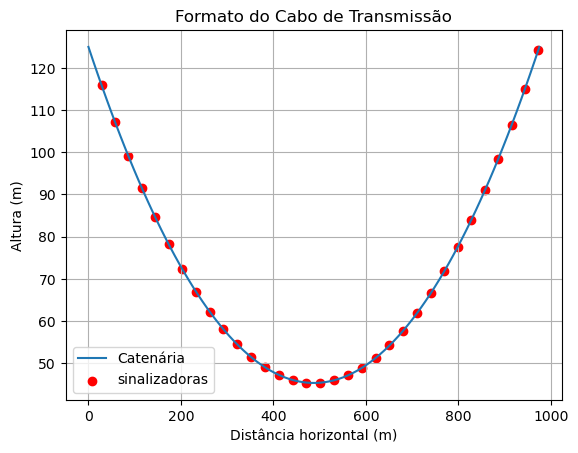

In [28]:
import matplotlib.pyplot as plt

x = np.linspace(-L/2, L/2, 100)
y = catenaria(x,a)-a+altura_torre-f  # Ajuste para y=0 no ponto mais baixo

plt.plot(x+L/2, y, label="Catenária")
plt.scatter([i[0] for i in pontos], [i[1] for i in pontos],c='r',label='sinalizadoras')
plt.xlabel("Distância horizontal (m)")
plt.ylabel("Altura (m)")
plt.title("Formato do Cabo de Transmissão")
plt.grid()
plt.legend()
plt.show()

In [31]:
# altura_torre = 115360 + 9640 
# altura_camera = 12000 + 4360 + 12000 + 2500
# metade_horizontal = 14300
# offset_horizontal = 0 
# camera_horizontal = metade_horizontal - offset_horizontal


x_sinalizadores = np.array([i[0] for i in pontos])
z_sinalizadores = np.array([i[1] for i in pontos])
y_sinalizadores = metade_horizontal

distancia = np.sqrt(
                (x_sinalizadores - 0)**2 + (z_sinalizadores-altura_camera)**2 + \
                (y_sinalizadores - camera_horizontal)**2)


# y_sinalizadores
distancia, len(distancia), len(pontos)

(array([ 95.4972375 , 130.27030957, 180.03101081, 235.42859654,
        293.23694756, 352.21070478, 411.78081454, 471.64684182,
        531.63037735, 591.61498477, 651.51890706, 711.2816149 ,
        770.85673444, 830.20811746, 889.30753653, 948.13324759,
         89.6779909 , 109.98087609, 154.08651552, 207.30061676,
        264.13325228, 322.62277721, 381.94393115, 441.68991235,
        501.6322357 , 561.62826929, 621.58120865, 681.42108636,
        741.09508956, 800.56232302, 859.79082048, 918.75573984,
        977.43819679]),
 33,
 33)

### Create vector for code

In [37]:

y_sinalizadores = metade_horizontal

x_sinalizadores = np.array([i[0] for i in pontos_L])
z_sinalizadores = np.array([i[1] for i in pontos_L])


distancia_L = np.sqrt(
                (x_sinalizadores - 0)**2 + (z_sinalizadores-altura_camera)**2 + \
                (y_sinalizadores - camera_horizontal)**2)

x_sinalizadores = np.array([i[0] for i in pontos_R])
z_sinalizadores = np.array([i[1] for i in pontos_R])

distancia_R = np.sqrt(
                (x_sinalizadores - 0)**2 + (z_sinalizadores-altura_camera)**2 + \
                (y_sinalizadores - camera_horizontal)**2)

# y_sinalizadores
distancia_L[:5],  distancia_R[:6][::-1]

(array([ 95.4972375 , 130.27030957, 180.03101081, 235.42859654,
        293.23694756]),
 array([322.62277721, 264.13325228, 207.30061676, 154.08651552,
        109.98087609,  89.6779909 ]))

In [49]:
old_vector = [97.03452097, 132.67746731, 182.81089,    238.42127226, 296.38054131 ,
 325.82715964 ,267.20685889 ,210.19780552 ,156.71269605 ,112.05005222, 90.47079257]
new_vector = [i for i in distancia_L[:5]] + [i for i in distancia_R[:6][::-1]]
new_vector

len(new_vector), len(old_vector)

convert_dict = {}
for i in range(len(new_vector)):
    convert_dict[old_vector[i]] = new_vector[i]

convert_dict

{97.03452097: 95.4972374999314,
 132.67746731: 130.27030956792788,
 182.81089: 180.0310108131289,
 238.42127226: 235.42859654318062,
 296.38054131: 293.236947560716,
 325.82715964: 322.6227772103269,
 267.20685889: 264.133252280173,
 210.19780552: 207.30061676158186,
 156.71269605: 154.08651552205345,
 112.05005222: 109.98087608564406,
 90.47079257: 89.6779908953997}

In [ ]:
list(map(lambda x: convert_dict[x], old_vector)) 

TypeError: unsupported operand type(s) for -: 'list' and 'list'

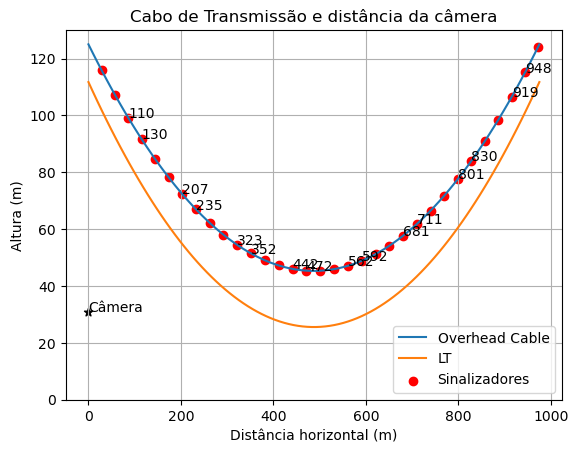

In [30]:
import matplotlib.pyplot as plt

x = np.linspace(-L/2, L/2, 100)
y = catenaria(x,a)-a+altura_torre-f  # Ajuste para y=0 no ponto mais baixo

y_LT = catenaria(x,a_LT)-a_LT+altura_LT-f_LT  # Ajuste para y=0 no ponto mais baixo
plt.plot(x+L/2, y, label="Overhead Cable")
plt.plot(x+L/2, y_LT, label="LT")

plt.scatter([i[0] for i in pontos], [i[1] for i in pontos],c='r',label='Sinalizadores')
plt.scatter([0],[altura_camera],marker='*',c='k')
plt.annotate("Câmera",(0,altura_camera))

plt.xlabel("Distância horizontal (m)")
plt.ylabel("Altura (m)")
plt.title("Cabo de Transmissão e distância da câmera")
plt.ylim([0,130])
plt.grid()
plt.legend(loc='lower right')
for i,(x,y,d) in enumerate(pontos):
    if i%2==0:
        continue
    # print(i, x, y, distancia[i])
    plt.annotate(str(round(distancia[i])),(x,y))
plt.show()